# Spectral clustering of BGCs 

In [1]:
from setup_paths import setup_paths_simon
MIBIG_JSON_DIR,NODES_FILE,DEREP_ANNOTATIONS,MGF_FILE,EDGES_FILE,FOLDERS,ROOT_PATH,ANTISMASH_DIR = setup_paths_simon()

import sys
sys.path.append('/Users/simon/git/lda/code')



In [2]:
import pylab as plt
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# import from NPlinker
from metabolomics import load_spectra
from metabolomics import load_metadata
from metabolomics import load_edges
from metabolomics import make_families
from genomics import loadBGC_from_cluster_files
from genomics import make_mibig_bgc_dict

from data_linking import DataLinks
from data_linking import LinkLikelihood
from data_linking import LinkFinder

# import general packages
import os
import glob

In [5]:
spectra = load_spectra(MGF_FILE)
for s in spectra:
    s.annotation_from_metadata()
load_edges(spectra, EDGES_FILE)
families = make_families(spectra)
metadata = load_metadata(spectra, NODES_FILE)

input_files = []
ann_files = []
mibig_bgc_dict = make_mibig_bgc_dict(MIBIG_JSON_DIR)

for folder in FOLDERS:
    print("Processing subfolder %s" % folder, end='')
    fam_file = os.path.join(ROOT_PATH, folder)
    if os.path.exists(fam_file):
        print("")
        cluster_file = glob.glob(fam_file + os.sep + folder + "_clustering*75*")
        annotation_files = glob.glob(fam_file + os.sep + "Network_*")
        #print(cluster_file[0])
        #print(annotation_files[0])
        input_files.append(cluster_file[0])
        ann_files.append(annotation_files[0])
    else:
        print(" - not found")
gcf_list, bgc_list, strain_list = loadBGC_from_cluster_files(input_files, ann_files, antismash_dir=ANTISMASH_DIR, antismash_format = 'flat', mibig_bgc_dict=mibig_bgc_dict)

Loaded 3125 molecules
Found 1816 MiBIG json files
Processing subfolder NRPS


In [6]:
all_strains = set()
for k in spectra[0].metadata.keys():
    if k.startswith('KRD'):
        all_strains.add(k)

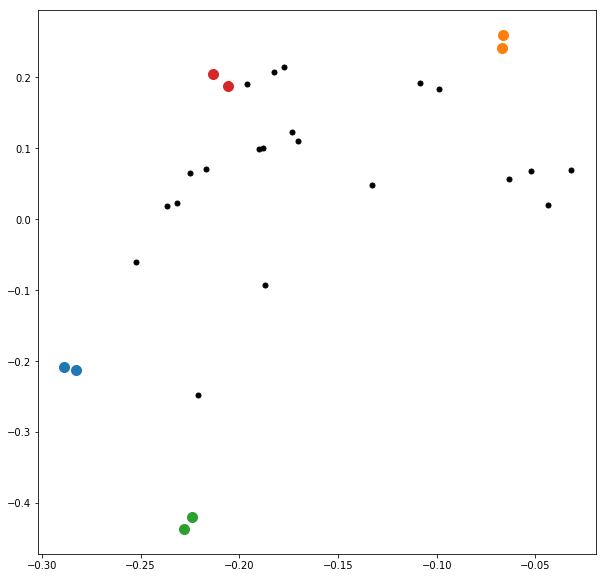

In [69]:
from spec_clustering import bgc_projection
weights = [0.0,1.0,0.0]
bgc_projection_dict,family_dict = bgc_projection('/Users/simon/TempStuff/spec_clust/carnegie-similarity-matrix-nrps.bin',bgc_list,weights = weights)
from spec_clustering import plot_families
plot_families(bgc_projection_dict,family_dict,min_size=2)

['MiBIG', 'KRD026', 'KRD162', 'KRD171', 'KRD175', 'KRD197', 'KRD202']


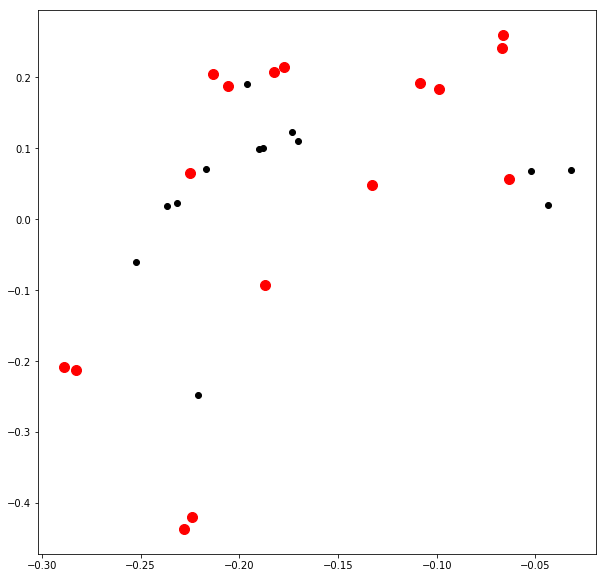

In [70]:
from spec_clustering import plot_and_highlight
plot_and_highlight(bgc_projection_dict,strain_list[2:5])
print(strain_list)

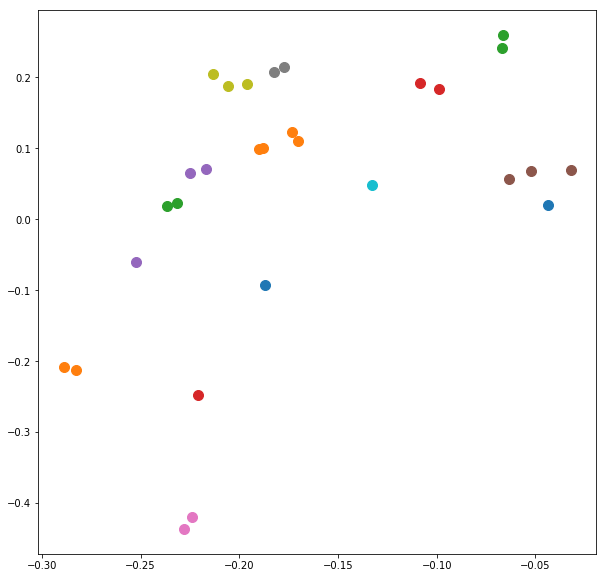

In [71]:
from spec_clustering import hierarchical_clustering
hfam,h_gcf_list = hierarchical_clustering(bgc_projection_dict,K=15)
plot_families(bgc_projection_dict,hfam,min_size=0)

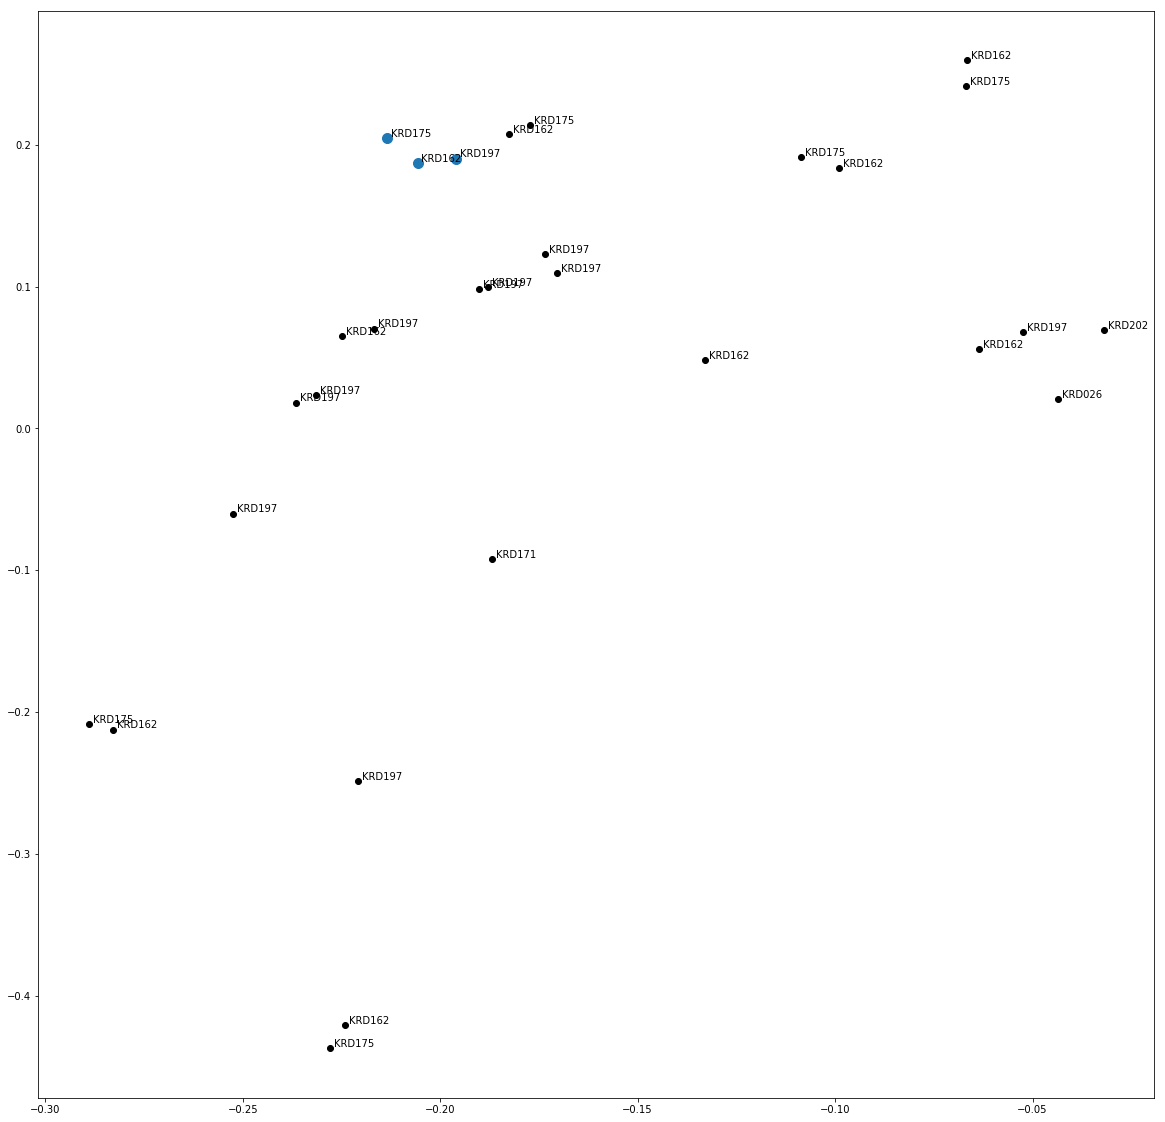

In [72]:
from spec_clustering import plot_families_strain_highlight
plot_families_strain_highlight(bgc_projection_dict,h_gcf_list,['KRD162','KRD175','KRD197'])